In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define constants
a = 0.2
L = 1.0
N = 201
dx = L / (N - 1)
dt = 0.5 * dx / a
x = np.linspace(0, L, N)
T = 2.5


In [3]:
# Define initial condition
def u0(x):
    return np.sin(2 * np.pi * x)

# Implement Crank-Nicolson discretization scheme
def crank_nicolson_update(u, a, dt, dx):
    lambd = a * dt / (2 * dx)
    N = len(u) - 1

    # Construct the tridiagonal matrix A
    A = np.diagflat([-lambd] * N, -1) + np.diagflat([1 + 2 * lambd] * (N + 1)) + np.diagflat([-lambd] * N, 1)

    # Construct the right-hand side vector b
    b = u.copy()
    b[:-1] += lambd * (u[1:] - u[:-1])
    b[1:] += lambd * (u[:-1] - u[1:])

    # Solve the system of equations
    u = np.linalg.solve(A, b)

    return u

Wave energy (initial): 1.2275e-06
Wave energy (final): 9.435e-07
Wave Energy Percentage Change -23.14 %


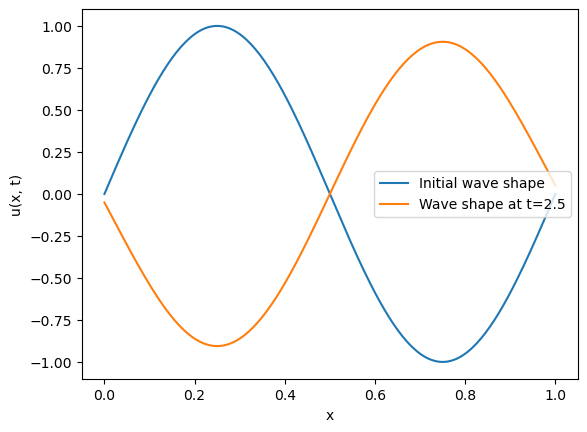

In [4]:
# Solve the wave equation using Crank-Nicolson method
u = u0(x+(a*T))
for t in np.arange(0, T, dt):
    u = crank_nicolson_update(u, a, dt, dx)

# Calculate wave energy
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

E_initial = wave_energy(u0(x), dx) / N
E_final = wave_energy(u, dx) / N

print("Wave energy (initial):", round(E_initial, 10))
print("Wave energy (final):", round(E_final, 10))
print("Wave Energy Percentage Change", round(((E_final - E_initial) / E_initial * 100), 2), "%")

# Plot the solution
plt.plot(x, u0(x), label="Initial wave shape")
plt.plot(x, u, label="Wave shape at t=2.5")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()
plt.show()
